In [3]:
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=4, linewidth=500, threshold=500, suppress=True)
%matplotlib notebook

# Data Science Tools III: Predicting Employee Churn

![](images/logo.png)

Welcome to another Session from the datakirk. In this notebook we will be exploring data concerning employees at a company. Imagine the following situation: 

You are working for a data science consultancy. The client is concerned about retention of its high performing employees and has asked you to investigate how it can improve retention of such colleagues. The client is also interested in being able to predict exactly which of its employees is most at risk of leaving. To aid in this task, the client has provided some
data which includes attributes of its current and past employees. 

<img src="images/task.png" style="width: 800px;" />

The data provides the following attributes:

| Attribute             | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| satisfaction_level    | Employee satisfaction rating, ranging from 0 to 1, with 1 indicating the highest satisfaction level |
| last_evaluation       | Employee performance evaluation rating, ranging from 0 to 1, with 1 indicating a the highest performance level |
| average_monthly_hours | The average number of hours worked each month                |
| time_spend_company    | The number of years spent at the company                     |
| Work_accident         | Whether or not the employee was involved in a workplace accident. “1” indicates that they were, “0” indicates that they were not |
| promotion_last_5years | Whether or not the employee has been promoted at least once in the past five years. “1” indicates that they were, “0” indicates that they were not |
| department            | The department the employee is working in                    |
| salary                | The salary classification of the employee, ranging across “low”, “medium”, and “high” |
| left                  | Whether or not the employee has left the company             |


### What information can we find out from this dataset, and how can we predict whether an employee will leave?

In [110]:
data = pd.read_csv('employees.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


# Initial Data Exploration

## Split the data into leavers and remainers

In [12]:
leavers = data[data['left'] == 1]
remainers = data[data['left'] == 0]

In [13]:
leavers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [14]:
remainers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
2000,0.58,0.74,4,215,3,0,0,sales,low,0
2001,0.82,0.67,2,202,3,0,0,sales,low,0
2002,0.45,0.69,5,193,3,0,0,sales,low,0
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2004,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,1,management,high,0
14207,0.74,0.95,5,266,10,0,1,management,high,0
14208,0.85,0.54,3,185,10,0,1,management,high,0
14209,0.33,0.65,3,172,10,0,1,marketing,high,0


## Lets histogram the columns for the remainers and leavers

<IPython.core.display.Javascript object>


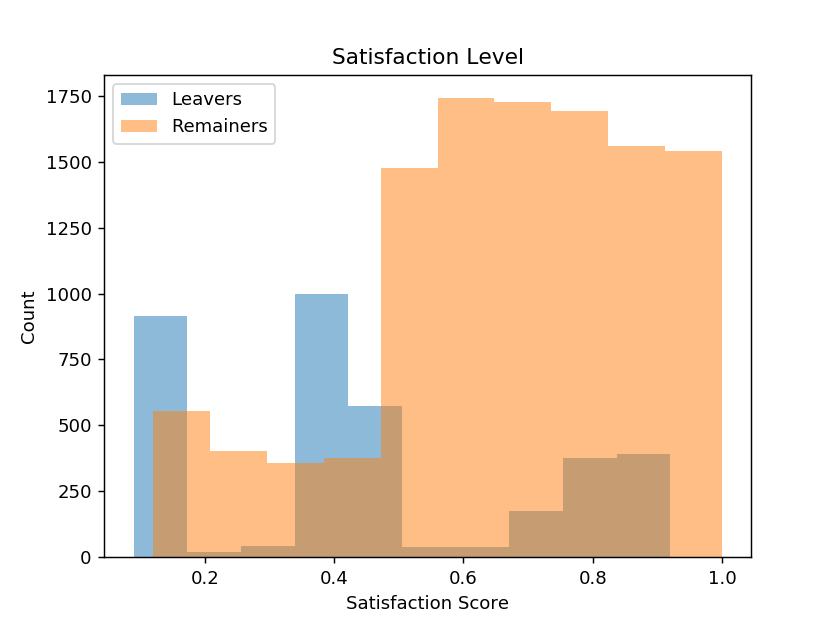

In [23]:
# satisfaction level

plt.figure()

plt.hist(leavers['satisfaction_level'], alpha=0.5, label='Leavers')
plt.hist(remainers['satisfaction_level'], alpha=0.5, label='Remainers')

plt.title('Satisfaction Level')

plt.xlabel('Satisfaction Score')
plt.ylabel('Count')

plt.legend()

<IPython.core.display.Javascript object>


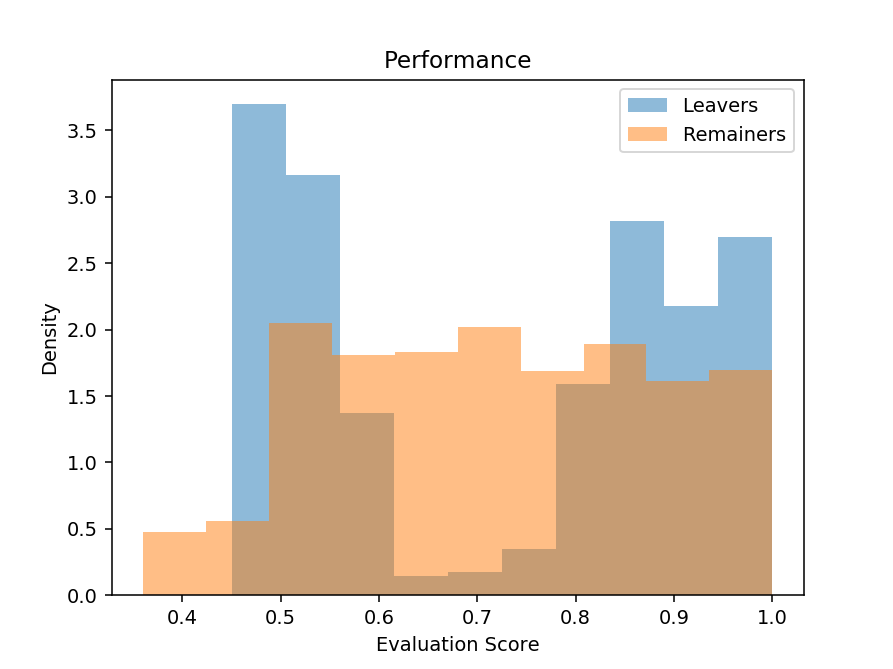

In [34]:
# Performance

plt.figure()

plt.hist(leavers['last_evaluation'], alpha=0.5, label='Leavers', density=True)
plt.hist(remainers['last_evaluation'], alpha=0.5, label='Remainers', density=True)

plt.title('Performance')

plt.xlabel('Evaluation Score')
plt.ylabel('Density')

plt.legend()

In [56]:
l_num

2    1567
6     655
5     612
4     409
7     256
3      72
Name: Leavers, dtype: int64

In [57]:
r_num

3    3983
4    3956
5    2149
2     821
6     519
Name: Remainers, dtype: int64

<IPython.core.display.Javascript object>


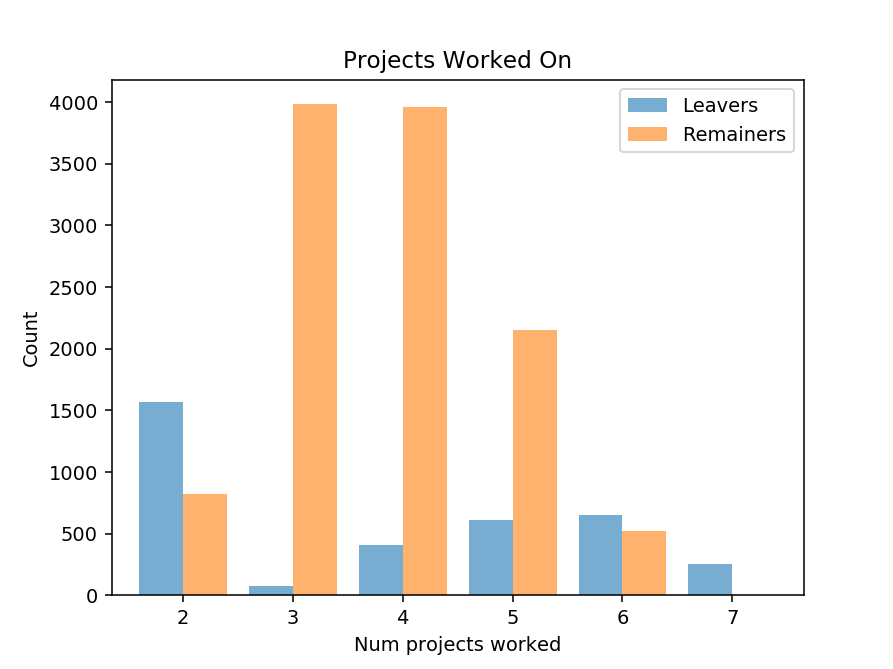

Text(0.5, 1.0, 'Projects Worked On')

In [55]:
# number of projects

l_num = leavers['number_project'].value_counts().rename('Leavers')

r_num = remainers['number_project'].value_counts().rename('Remainers')

pd.concat([l_num, r_num], axis=1).plot.bar(width=0.8, alpha=0.6)

plt.xticks(rotation=0)

plt.xlabel('Num projects worked')
plt.ylabel('Count')
plt.title('Projects Worked On')

<IPython.core.display.Javascript object>


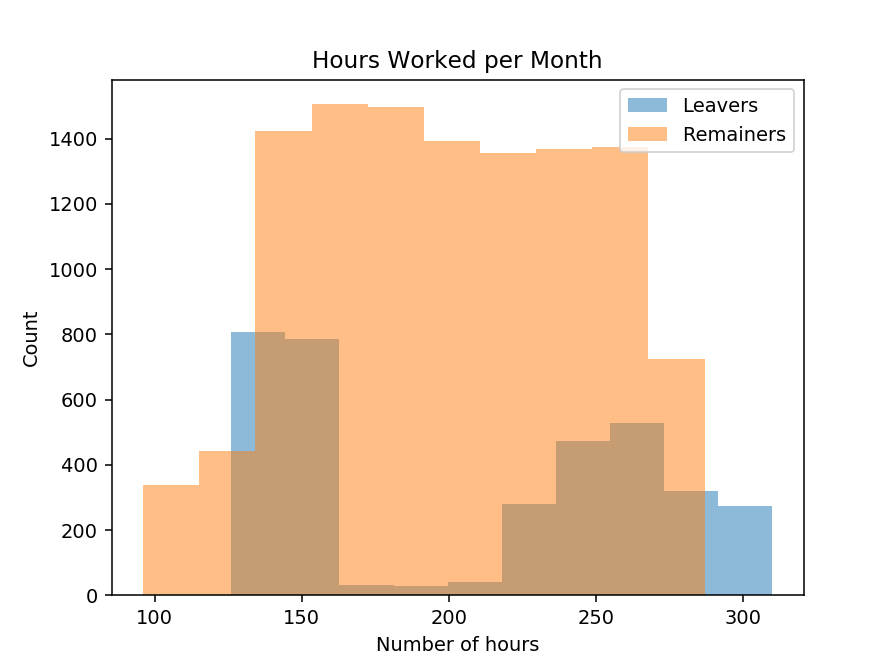

In [71]:
# Performance

plt.figure()

plt.hist(leavers['average_montly_hours'], alpha=0.5, label='Leavers')
plt.hist(remainers['average_montly_hours'], alpha=0.5, label='Remainers')

plt.title('Hours Worked per Month')

plt.xlabel('Number of hours')
plt.ylabel('Count')

plt.legend()

<IPython.core.display.Javascript object>


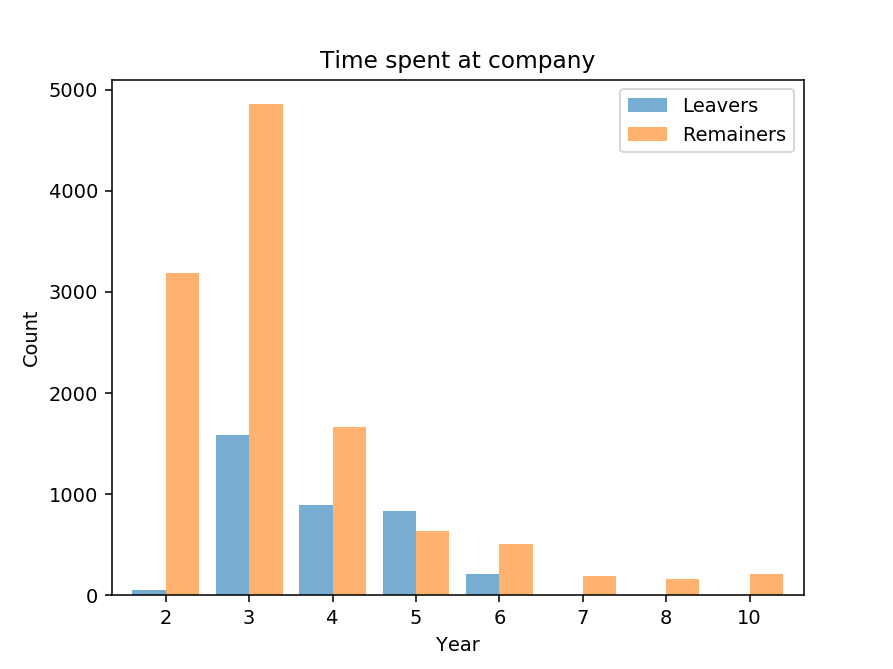

Text(0.5, 1.0, 'Time spent at company')

In [73]:
# number of years

l_num = leavers['time_spend_company'].value_counts().rename('Leavers')

r_num = remainers['time_spend_company'].value_counts().rename('Remainers')

pd.concat([l_num, r_num], axis=1).plot.bar(width=0.8, alpha=0.6)

plt.xticks(rotation=0)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Time spent at company')

<IPython.core.display.Javascript object>


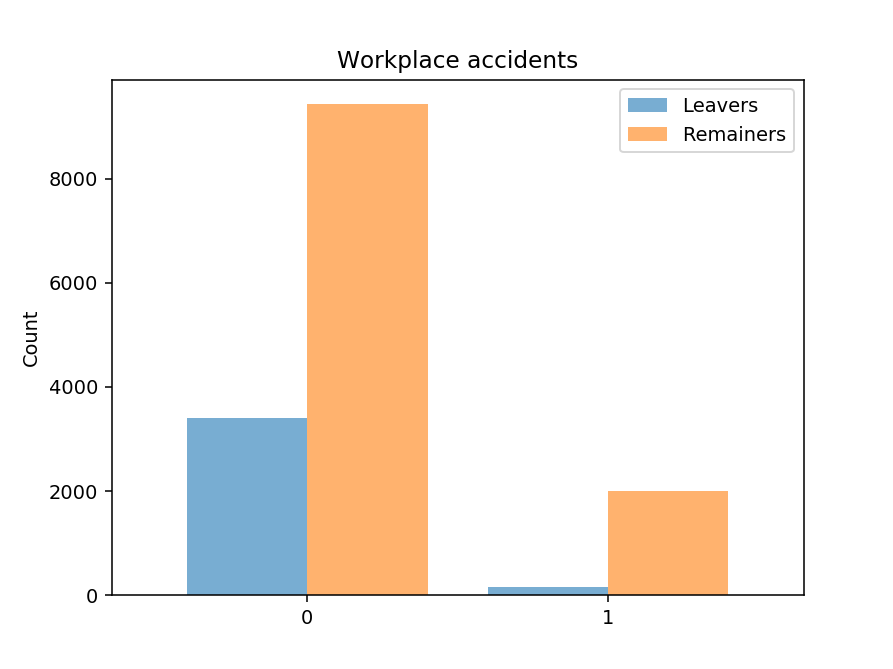

Text(0.5, 1.0, 'Workplace accidents')

In [77]:
# number of years

l_num = leavers['Work_accident'].value_counts().rename('Leavers')

r_num = remainers['Work_accident'].value_counts().rename('Remainers')

pd.concat([l_num, r_num], axis=1).plot.bar(width=0.8, alpha=0.6)

plt.xticks(rotation=0)

# plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Workplace accidents')

<IPython.core.display.Javascript object>


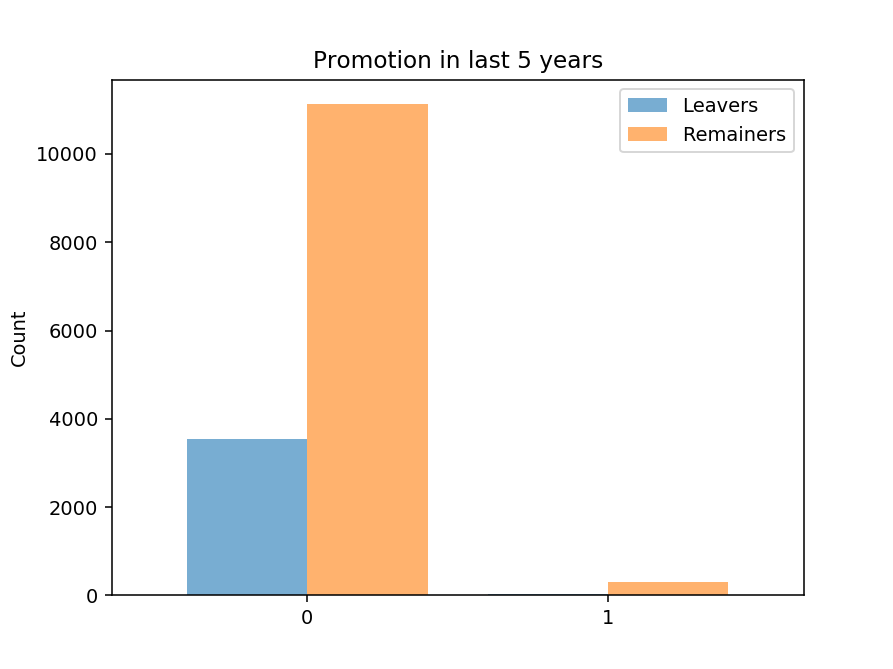

Text(0.5, 1.0, 'Promotion in last 5 years')

In [78]:
# number of years

l_num = leavers['promotion_last_5years'].value_counts().rename('Leavers')

r_num = remainers['promotion_last_5years'].value_counts().rename('Remainers')

pd.concat([l_num, r_num], axis=1).plot.bar(width=0.8, alpha=0.6)

plt.xticks(rotation=0)

# plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Promotion in last 5 years')

In [87]:
l_num / l_num.sum()

sales          0.283954
technical      0.195183
support        0.155419
IT             0.076449
hr             0.060207
accounting     0.057127
marketing      0.056847
product_mng    0.055447
RandD          0.033884
management     0.025483
Name: Leavers, dtype: float64

<IPython.core.display.Javascript object>


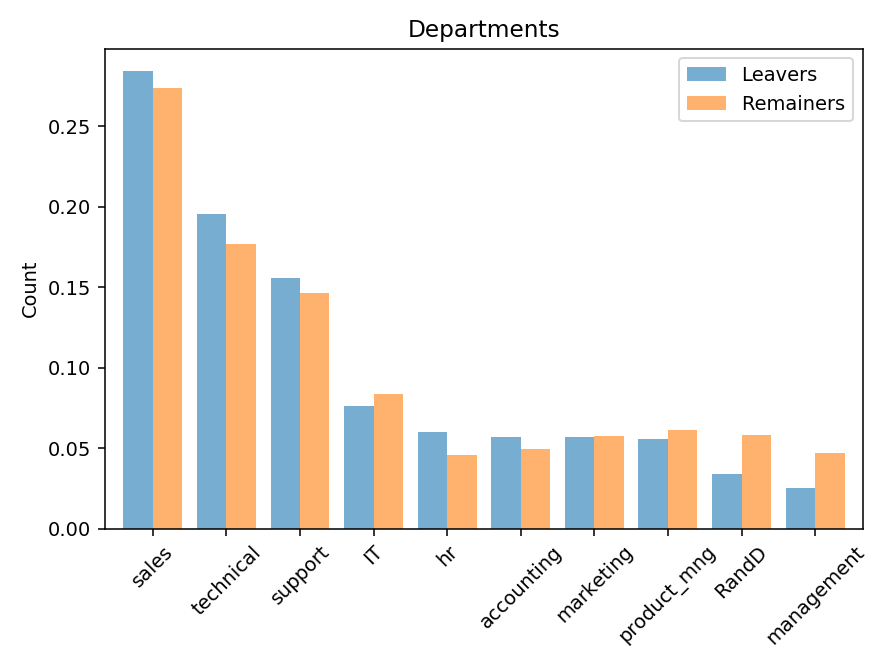

In [84]:
l_num = leavers['department'].value_counts().rename('Leavers')

r_num = remainers['department'].value_counts().rename('Remainers')

pd.concat([l_num / l_num.sum(), r_num / r_num.sum()], axis=1).plot.bar(width=0.8, alpha=0.6)

plt.xticks(rotation=45)

# plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Departments')

plt.tight_layout()

<IPython.core.display.Javascript object>


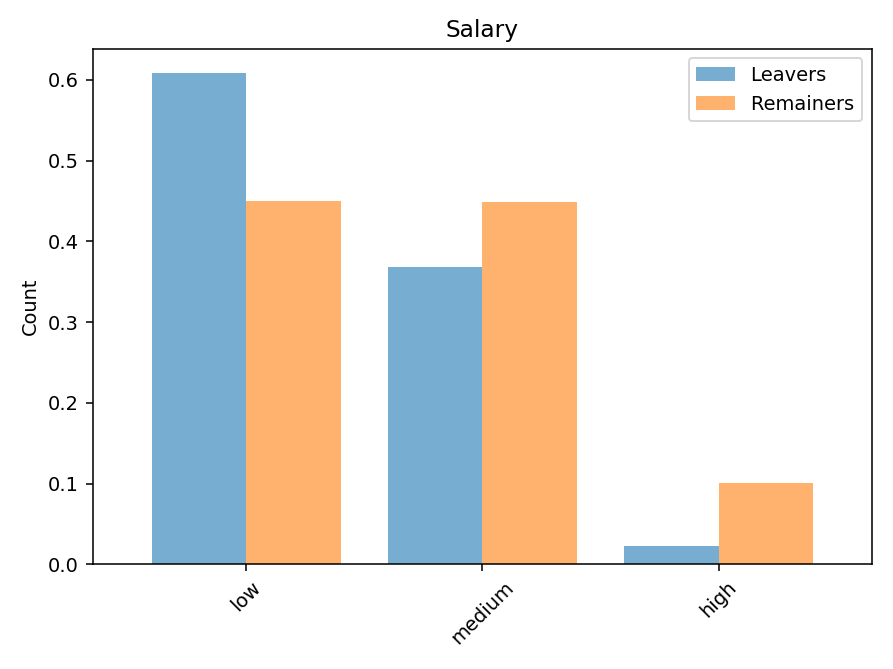

In [88]:
l_num = leavers['salary'].value_counts().rename('Leavers')

r_num = remainers['salary'].value_counts().rename('Remainers')

pd.concat([l_num / l_num.sum(), r_num / r_num.sum()], axis=1).plot.bar(width=0.8, alpha=0.6)

plt.xticks(rotation=45)

# plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Salary')

plt.tight_layout()

# Part 2: Prediction

## First, we need to one-hot-encode the categorical variables

In [115]:
data = pd.read_csv('employees.csv')

data['salary'][data['salary'] == 'low'] = 0
data['salary'][data['salary'] == 'medium'] = 1
data['salary'][data['salary'] == 'high'] = 2

data = data.drop('department', axis=1)

data

/home/ed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ed/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,0,1
1,0.80,0.86,5,262,6,0,0,1,1
2,0.11,0.88,7,272,4,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,1
14995,0.37,0.48,2,160,3,0,0,0,1
14996,0.37,0.53,2,143,3,0,0,0,1
14997,0.11,0.96,6,280,4,0,0,0,1


## Now lets split our data into the features and the target

In [116]:
X = data.drop('left', axis=1)
y = data['left']

## Next, it is good practice to scale the data columns to lie in roughly the same range

This can be achieved by subtracting the mean, and dividing by the standard deviation of each column

In [ ]:
X = (X - X.mean()) / X.std()

## It's now super important to split our data into a training set and a test set!!

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
y_test

2546     0
4421     0
11030    0
3967     0
6624     0
        ..
4524     0
1321     1
4922     0
11285    0
11722    0
Name: left, Length: 3000, dtype: int64

## We are now ready to choose and apply a predictive model

In [130]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [131]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [132]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

## Analyse the model

In [133]:
from sklearn.metrics import plot_confusion_matrix

<IPython.core.display.Javascript object>


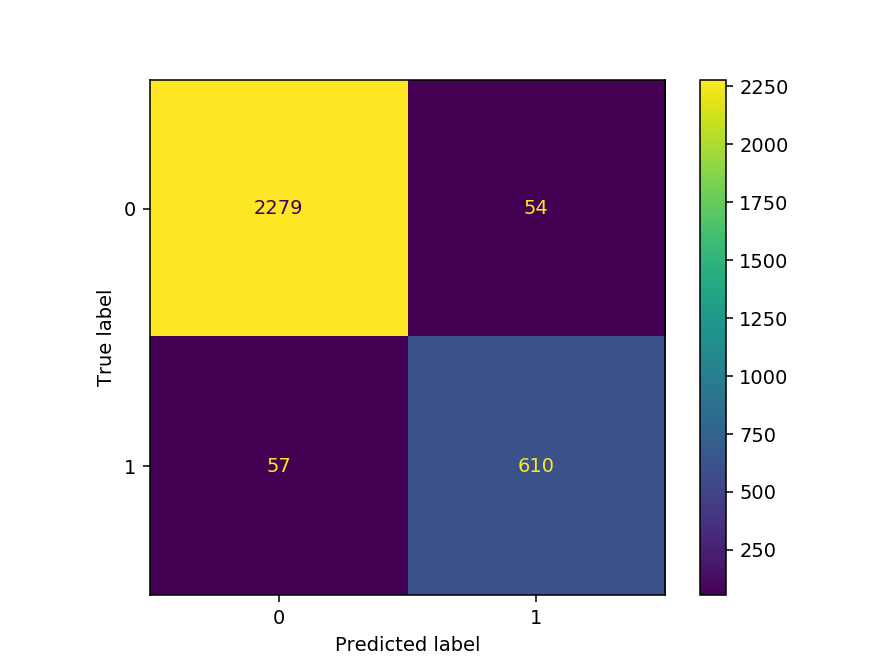

In [134]:
plot_confusion_matrix(model, X_test, y_test)

## Let's try a more advanced model

In [135]:
from sklearn.svm import LinearSVC

model2 = LinearSVC()

In [136]:
model2.fit(X_train, y_train)

/home/ed/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

<IPython.core.display.Javascript object>


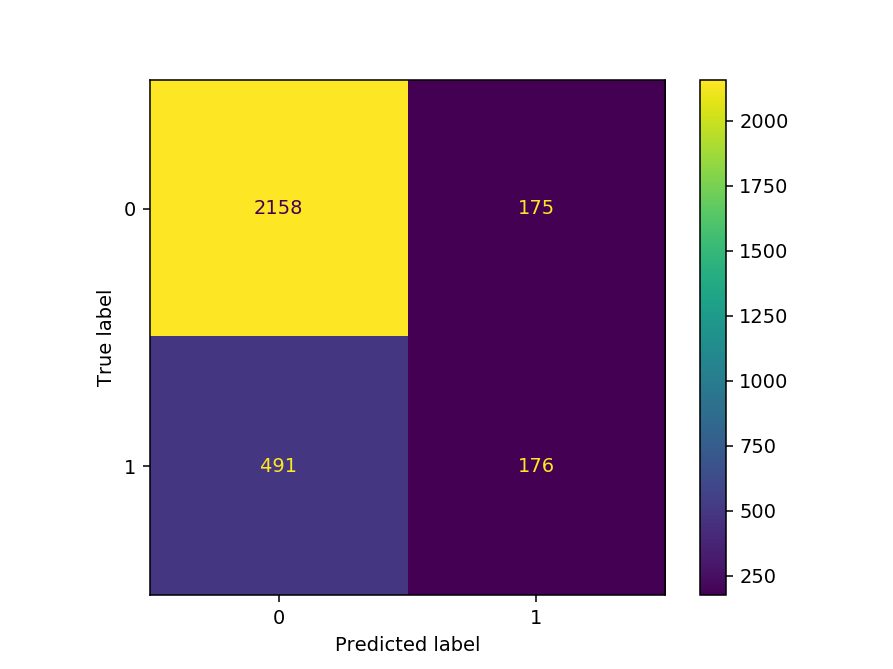

In [137]:
plot_confusion_matrix(model2, X_test, y_test)